<a href="https://colab.research.google.com/github/Alan-Cheong/IEEE_QW_2020/blob/master/Feynman_Path_Integral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feynman Path Integral Simulation

Simulating a quantum particle propagating from x=0 to x=1
The particle explores ALL possible paths simultaneously!

Key concepts:
- Each path contributes amplitude: exp(i*S/ℏ)
- S is the classical action for that path
- Total amplitude = sum over all paths
- Probability = |total amplitude|²



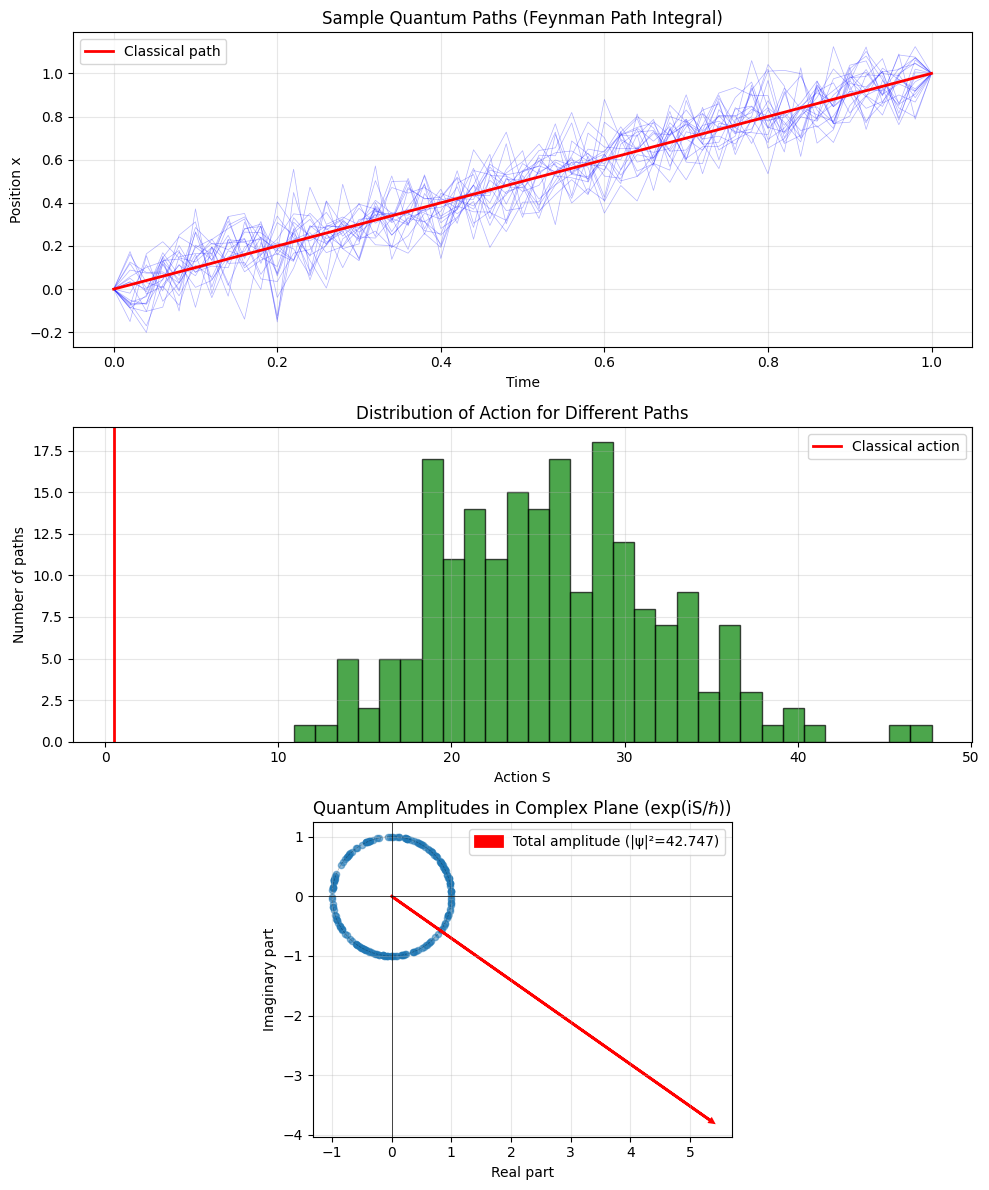

Transition probability: 42.747317

Note: In the complex plane plot, paths with similar actions
have similar phases and add constructively (quantum interference!)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class PathIntegral:
    """
    Simulate Feynman's path integral for a quantum particle.
    Models a particle moving from point A to point B in time T.
    """

    def __init__(self, x_start=0, x_end=1, time_total=1.0, n_steps=50, n_paths=100):
        """
        Initialize path integral simulation.

        Args:
            x_start: Starting position
            x_end: Ending position
            time_total: Total time for propagation
            n_steps: Number of time steps
            n_paths: Number of paths to sample
        """
        self.x_start = x_start
        self.x_end = x_end
        self.T = time_total
        self.N = n_steps
        self.n_paths = n_paths
        self.dt = time_total / n_steps
        self.hbar = 1.0  # Reduced Planck constant (natural units)
        self.m = 1.0     # Particle mass

    def generate_paths(self):
        """Generate random paths from start to end point."""
        paths = np.zeros((self.n_paths, self.N + 1))
        paths[:, 0] = self.x_start
        paths[:, -1] = self.x_end

        # Generate intermediate points with random walk
        # constrained to reach the endpoint
        for i in range(1, self.N):
            # Linear interpolation with random fluctuations
            linear = self.x_start + (self.x_end - self.x_start) * i / self.N
            fluctuation = np.random.normal(0, 0.1, self.n_paths)
            paths[:, i] = linear + fluctuation

        return paths

    def action(self, path):
        """
        Calculate the classical action S for a given path.
        S = ∫ L dt, where L = (1/2)m*v² - V(x)
        For free particle (V=0): S = (m/2) ∫ v² dt
        """
        velocities = np.diff(path) / self.dt
        kinetic_energy = 0.5 * self.m * velocities**2
        action = np.sum(kinetic_energy) * self.dt
        return action

    def quantum_amplitude(self, path):
        """
        Calculate quantum amplitude for a path.
        Amplitude = exp(i*S/ℏ)
        """
        S = self.action(path)
        return np.exp(1j * S / self.hbar)

    def calculate_propagator(self):
        """
        Calculate the quantum propagator by summing over all paths.
        K(x_f, x_i, T) = ∫ Dx(t) exp(i*S[x]/ℏ)
        """
        paths = self.generate_paths()
        amplitudes = []
        actions = []

        for path in paths:
            amp = self.quantum_amplitude(path)
            amplitudes.append(amp)
            actions.append(self.action(path))

        # Total amplitude is sum of all path amplitudes
        total_amplitude = np.sum(amplitudes)
        probability = np.abs(total_amplitude)**2

        return paths, np.array(amplitudes), np.array(actions), probability

    def plot_paths_and_phases(self):
        """Visualize paths and their quantum phases."""
        paths, amplitudes, actions, prob = self.calculate_propagator()

        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

        # Plot 1: Sample paths
        time_points = np.linspace(0, self.T, self.N + 1)
        for i, path in enumerate(paths[:20]):  # Show first 20 paths
            alpha = 0.3
            ax1.plot(time_points, path, 'b-', alpha=alpha, linewidth=0.5)

        # Highlight classical path (straight line)
        classical_path = np.linspace(self.x_start, self.x_end, self.N + 1)
        ax1.plot(time_points, classical_path, 'r-', linewidth=2,
                label='Classical path')
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Position x')
        ax1.set_title('Sample Quantum Paths (Feynman Path Integral)')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # Plot 2: Action distribution
        ax2.hist(actions, bins=30, alpha=0.7, color='green', edgecolor='black')
        ax2.axvline(self.action(classical_path), color='red', linewidth=2,
                   label='Classical action')
        ax2.set_xlabel('Action S')
        ax2.set_ylabel('Number of paths')
        ax2.set_title('Distribution of Action for Different Paths')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # Plot 3: Quantum phases in complex plane
        real_parts = np.real(amplitudes)
        imag_parts = np.imag(amplitudes)

        ax3.scatter(real_parts, imag_parts, alpha=0.5, s=20)

        # Draw unit circle
        theta = np.linspace(0, 2*np.pi, 100)
        ax3.plot(np.cos(theta), np.sin(theta), 'k--', alpha=0.3, linewidth=0.5)

        # Draw sum of amplitudes
        total_amp = np.sum(amplitudes)
        ax3.arrow(0, 0, np.real(total_amp), np.imag(total_amp),
                 head_width=0.05, head_length=0.05, fc='red', ec='red',
                 linewidth=2, label=f'Total amplitude (|ψ|²={prob:.3f})')

        ax3.set_xlabel('Real part')
        ax3.set_ylabel('Imaginary part')
        ax3.set_title('Quantum Amplitudes in Complex Plane (exp(iS/ℏ))')
        ax3.set_aspect('equal')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        ax3.axhline(y=0, color='k', linewidth=0.5)
        ax3.axvline(x=0, color='k', linewidth=0.5)

        plt.tight_layout()
        plt.show()

        return prob

# Run the simulation
print("Feynman Path Integral Simulation")
print("=" * 50)
print("\nSimulating a quantum particle propagating from x=0 to x=1")
print("The particle explores ALL possible paths simultaneously!")
print("\nKey concepts:")
print("- Each path contributes amplitude: exp(i*S/ℏ)")
print("- S is the classical action for that path")
print("- Total amplitude = sum over all paths")
print("- Probability = |total amplitude|²\n")

# Create and run simulation
sim = PathIntegral(x_start=0, x_end=1, time_total=1.0,
                   n_steps=50, n_paths=200)
probability = sim.plot_paths_and_phases()

print(f"Transition probability: {probability:.6f}")
print("\nNote: In the complex plane plot, paths with similar actions")
print("have similar phases and add constructively (quantum interference!)")

Here's an example of how to compile and run a simple C++ program in a code cell:

In [ ]:
%%shell
echo "#include <iostream>
int main() {
    std::cout << \"Hello from C++!\" << std::endl;
    return 0;
}" > hello.cpp
g++ hello.cpp -o hello
./hello

Hello from C++!


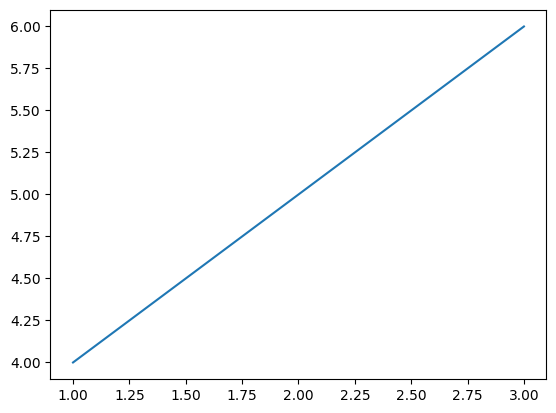

In [4]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3], [4, 5, 6])
plt.show()

In [20]:
(cd "$(git rev-parse --show-toplevel)" && git apply --3way <<'EOF'
diff --git a/map_path_integral.py b/map_path_integral.py
--- a/map_path_integral.py
+++ b/map_path_integral.py
@@ -0,0 +1,296 @@
+#!/usr/bin/env python3
+"""
+Map-inspired multi-slit simulation using Feynman's path integral (free propagator).
+
+- Prudential Tower: point source
+- North–south streets: treated as parallel slits on a single aperture plane
+- Maxwell Road: detection screen (line) where intensity is measured
+
+The program computes the complex amplitude at each point on the screen by
+integrating the free-particle propagator from the source to each point within
+every street-slit, then from the slit to the screen. Interference arises by
+summing over all allowed intermediate points (i.e. paths constrained to pass
+through the streets), which is the path-integral picture with one intermediate
+slice.
+
+Two unit systems are supported:
+  1) electron: uses physical electron mass and energy (eV) to get time of flight
+  2) dimensionless: sets m = hbar = 1 and uses distances as times (good for
+     qualitative patterns at human scales)
+
+Example:
+  python map_path_integral.py --preset sg --units dimensionless \
+      --output maxwell_intensity.png
+
+To tweak streets manually:
+  python map_path_integral.py --slits "Cecil:200:20,Tras:-80:18,TgPagar:-180:22,SouthBridge:280:20,Neil:-260:20" \
+      --units dimensionless --output maxwell_intensity.png
+
+Where each slit is NAME:X_CENTER:WIDTH in meters (or arbitrary units if
+--units=dimensionless).
+"""
+from __future__ import annotations
+
+import argparse
+from dataclasses import dataclass
+from typing import List, Tuple
+import numpy as np
+import matplotlib
+
+# Use a non-interactive backend so this runs headless without display servers
+matplotlib.use("Agg")
+import matplotlib.pyplot as plt
+
+# Physical constants (SI)
+HBAR = 1.054_571_817e-34
+ELECTRON_MASS = 9.109_383_7015e-31
+ELEMENTARY_CHARGE = 1.602_176_634e-19
+
+
+@dataclass
+class Slit:
+    name: str
+    x_center: float  # meters (or arbitrary units in dimensionless mode)
+    width: float     # meters (or arbitrary units in dimensionless mode)
+
+    def sample_points(self, num_samples: int) -> Tuple[np.ndarray, float]:
+        half = self.width / 2.0
+        xs = np.linspace(self.x_center - half, self.x_center + half, num_samples)
+        dx = xs[1] - xs[0] if num_samples > 1 else self.width
+        return xs, dx
+
+
+def free_kernel_prefactor(dt: float, mass: float, hbar: float) -> complex:
+    """Return the 1D free-particle propagator prefactor.
+
+    K(x, t) ~ sqrt(m / (2π i ħ t)) * exp(i m (Δx)^2 / (2 ħ t))
+    The overall constant does not affect the normalized intensity, but the
+    square-root form is standard and numerically more stable.
+    """
+    return np.sqrt(mass / (2.0 * np.pi * 1j * hbar * dt))
+
+
+def free_kernel_phase(dist2: np.ndarray, dt: float, mass: float, hbar: float) -> np.ndarray:
+    return np.exp(1j * mass * dist2 / (2.0 * hbar * dt))
+
+
+def compute_velocity_for_electron(energy_ev: float) -> float:
+    energy_j = energy_ev * ELEMENTARY_CHARGE
+    return np.sqrt(2.0 * energy_j / ELECTRON_MASS)
+
+
+def parse_slits_arg(slits_arg: str) -> List[Slit]:
+    slits: List[Slit] = []
+    for part in slits_arg.split(','):
+        part = part.strip()
+        if not part:
+            continue
+        try:
+            name, x_str, w_str = part.split(':', 2)
+        except ValueError:
+            raise ValueError(f"Invalid --slits segment '{part}'. Expected NAME:X:WIDTH")
+        slits.append(Slit(name=name, x_center=float(x_str), width=float(w_str)))
+    if not slits:
+        raise ValueError("No valid slits parsed from --slits")
+    return slits
+
+
+def streets_preset_sg() -> List[Slit]:
+    """A rough, map-inspired set of north–south streets near Maxwell Road.
+
+    Positions are heuristic and only intended to give a visually interesting
+    interference pattern; they are not geodetically accurate.
+    """
+    # x positions in meters (arbitrary scale); widths ~ street widths
+    return [
+        Slit("Neil Rd", x_center=-260.0, width=20.0),
+        Slit("Tg Pagar Rd", x_center=-180.0, width=22.0),
+        Slit("Tras St", x_center=-80.0, width=18.0),
+        Slit("Cecil St", x_center=160.0, width=22.0),
+        Slit("South Bridge Rd", x_center=260.0, width=20.0),
+    ]
+
+
+def preset_to_slits(preset: str) -> List[Slit]:
+    key = (preset or '').strip().lower()
+    if key in ("sg", "singapore", "telok-ayer"):
+        return streets_preset_sg()
+    raise ValueError(f"Unknown preset '{preset}'. Use 'sg' or pass --slits explicitly.")
+
+
+def compute_screen_intensity(
+    slits: List[Slit],
+    source_x: float,
+    aperture_y: float,
+    screen_y: float,
+    screen_width: float,
+    screen_samples: int,
+    slit_samples: int,
+    units: str,
+    energy_ev: float,
+) -> Tuple[np.ndarray, np.ndarray]:
+    """Compute intensity on the screen via one-slice path integral through slits.
+
+    Returns (x_screen, intensity_normalized).
+    """
+    if screen_y <= aperture_y:
+        raise ValueError("screen_y must be greater than aperture_y")
+
+    # Screen sampling points
+    x_screen = np.linspace(-screen_width / 2.0, screen_width / 2.0, screen_samples)
+
+    # Unit handling
+    units_key = units.strip().lower()
+    if units_key == "electron":
+        v = compute_velocity_for_electron(energy_ev)
+        dt1 = aperture_y / v
+        dt2 = (screen_y - aperture_y) / v
+        mass = ELECTRON_MASS
+        hbar = HBAR
+    elif units_key == "dimensionless":
+        # Handy qualitative mode: m=hbar=1, and time equals distance along y.
+        mass = 1.0
+        hbar = 1.0
+        dt1 = float(aperture_y)
+        dt2 = float(screen_y - aperture_y)
+    else:
+        raise ValueError("units must be 'electron' or 'dimensionless'")
+
+    # Precompute constants
+    c1 = free_kernel_prefactor(dt1, mass, hbar)
+    c2 = free_kernel_prefactor(dt2, mass, hbar)
+    y1 = aperture_y
+    y2 = screen_y
+
+    amplitude = np.zeros_like(x_screen, dtype=np.complex128)
+
+    # Accumulate contributions slit by slit to control memory use
+    for slit in slits:
+        xs, dx = slit.sample_points(slit_samples)
+
+        # Source -> slit (vector over slit samples)
+        dist2_src = (xs - source_x) ** 2 + (y1 - 0.0) ** 2
+        k1 = c1 * free_kernel_phase(dist2_src, dt1, mass, hbar)
+
+        # Slit -> screen (matrix: screen_samples x slit_samples)
+        # Avoid allocating huge matrices by chunking if needed
+        # Here, for typical sizes, direct allocation is fine.
+        xb = x_screen[:, None]
+        dist2_scr = (xb - xs[None, :]) ** 2 + (y2 - y1) ** 2
+        k2 = c2 * free_kernel_phase(dist2_scr, dt2, mass, hbar)
+
+        # Path integral over the slit width (Riemann sum)
+        amplitude += (k2 @ k1) * dx
+
+    intensity = np.abs(amplitude) ** 2
+    # Normalize for visualization
+    if intensity.max() > 0:
+        intensity /= intensity.max()
+    return x_screen, intensity
+
+
+def plot_results(
+    x_screen: np.ndarray,
+    intensity: np.ndarray,
+    slits: List[Slit],
+    aperture_y: float,
+    screen_y: float,
+    source_x: float,
+    out_path: str,
+    title: str,
+):
+    fig = plt.figure(figsize=(10, 6), constrained_layout=True)
+    gs = fig.add_gridspec(2, 1, height_ratios=[1, 2])
+
+    # Geometry panel
+    ax0 = fig.add_subplot(gs[0])
+    for i, slit in enumerate(slits):
+        ax0.add_patch(
+            plt.Rectangle(
+                (slit.x_center - slit.width / 2.0, aperture_y - 0.5),
+                slit.width,
+                1.0,
+                color="#4682b4",
+                alpha=0.6,
+                label="Street (slit)" if i == 0 else None,
+            )
+        )
+    ax0.axhline(screen_y, color="#2f4f4f", linestyle="--", label="Maxwell Rd (screen)")
+    ax0.plot([source_x], [0.0], marker="*", color="#d62728", markersize=12, label="Prudential Tower (source)")
+    ax0.set_ylabel("y (distance)")
+    ax0.set_xlabel("x (across streets)")
+    ax0.set_title("Geometry")
+    ax0.legend(loc="upper right", ncol=3, fontsize=8)
+
+    # Intensity panel
+    ax1 = fig.add_subplot(gs[1])
+    ax1.plot(x_screen, intensity, color="#111111")
+    ax1.set_xlabel("x on Maxwell Rd (screen)")
+    ax1.set_ylabel("Relative intensity")
+    ax1.set_title(title)
+    ax1.grid(True, alpha=0.25)
+
+    fig.suptitle("Map-inspired electron path integral (one intermediate slice)")
+    fig.savefig(out_path, dpi=160)
+    plt.close(fig)
+
+
+def main():
+    p = argparse.ArgumentParser(description="Feynman path-integral multi-slit over city streets")
+    presets = p.add_mutually_exclusive_group()
+    presets.add_argument("--preset", default="sg", help="Street preset: sg")
+    p.add_argument(
+        "--slits",
+        help="Custom slits as 'NAME:X:WIDTH,...' (overrides --preset)",
+    )
+    p.add_argument("--units", default="dimensionless", choices=["dimensionless", "electron"], help="Unit system")
+    p.add_argument("--energy-eV", type=float, default=50.0, help="Electron energy (eV) if --units=electron")
+    p.add_argument("--aperture-y", type=float, default=600.0, help="Distance from source to streets (same units as x)")
+    p.add_argument("--screen-y", type=float, default=1000.0, help="Distance from source to Maxwell Rd screen")
+    p.add_argument("--screen-width", type=float, default=800.0, help="Extent of screen plotted across x")
+    p.add_argument("--screen-samples", type=int, default=1401, help="Number of x samples on screen")
+    p.add_argument("--slit-samples", type=int, default=301, help="Samples across each street width")
+    p.add_argument("--source-x", type=float, default=0.0, help="x position of the Prudential Tower source")
+    p.add_argument("--output", default="maxwell_intensity.png", help="Output image path")
+
+    args = p.parse_args()
+
+    if args.slits:
+        slits = parse_slits_arg(args.slits)
+    else:
+        slits = preset_to_slits(args.preset)
+
+    x_screen, intensity = compute_screen_intensity(
+        slits=slits,
+        source_x=args.source_x,
+        aperture_y=args.aperture_y,
+        screen_y=args.screen_y,
+        screen_width=args.screen_width,
+        screen_samples=args.screen_samples,
+        slit_samples=args.slit_samples,
+        units=args.units,
+        energy_ev=args.energy_eV,
+    )
+
+    title = (
+        f"Screen @ y={args.screen_y}, streets @ y={args.aperture_y}, "
+        f"units={args.units}, energy={args.energy_eV} eV"
+    )
+    plot_results(
+        x_screen=x_screen,
+        intensity=intensity,
+        slits=slits,
+        aperture_y=args.aperture_y,
+        screen_y=args.screen_y,
+        source_x=args.source_x,
+        out_path=args.output,
+        title=title,
+    )
+
+    # Basic CLI printout
+    print(f"Saved intensity plot to {args.output}")
+
+
+if __name__ == "__main__":
+    main()
+
EOF
)

SyntaxError: invalid decimal literal (ipython-input-789720400.py, line 1)

In [22]:
#code runs only on Claude because it has JavaScript and other codes embedded into the Python code below"

import React, { useState, useEffect } from 'react';
import { LineChart, Line, XAxis, YAxis, CartesianGrid, Tooltip, Legend } from 'recharts';

const FeynmanPathIntegral = () => {
  const [numPaths, setNumPaths] = useState(50);
  const [wavelength, setWavelength] = useState(0.1);
  const [showPaths, setShowPaths] = useState(true);
  const [intensity, setIntensity] = useState([]);

  // Define key locations based on the map
  const source = { x: 50, y: 20, name: "Prudential Tower" };

  // Street "slits" - major intersections between source and screen
  const slits = [
    { x: 150, y: 50, name: "Cecil St" },
    { x: 170, y: 80, name: "Robinson Rd" },
    { x: 150, y: 110, name: "Shenton Way" },
    { x: 130, y: 140, name: "Telok Ayer" },
    { x: 170, y: 140, name: "Cross St" }
  ];

  // Screen (Maxwell Road)
  const screenX = 280;
  const screenPoints = 80;

  useEffect(() => {
    calculateIntensity();
  }, [numPaths, wavelength]);

  const calculateIntensity = () => {
    const intensityData = [];
    const k = 2 * Math.PI / wavelength; // wave number

    // Reference point: Wallich St & Maxwell Rd junction at y=130 (center-bottom of map)
    const wallichmaxwellY = 130;

    for (let i = 0; i < screenPoints; i++) {
      const screenY = 20 + (i * 160 / screenPoints);
      const screenPoint = { x: screenX, y: screenY };

      // Position relative to Wallich-Maxwell junction
      const relativePosition = screenY - wallichmaxwellY;

      // Calculate path integral sum
      let realSum = 0;
      let imagSum = 0;

      // Sum over all possible paths through each slit
      slits.forEach(slit => {
        const path1 = distance(source, slit);
        const path2 = distance(slit, screenPoint);
        const totalPath = path1 + path2;

        // Phase = k * path length
        const phase = k * totalPath;

        // Add complex amplitude: e^(i*phase)
        realSum += Math.cos(phase);
        imagSum += Math.sin(phase);
      });

      // Intensity is |amplitude|^2
      const amplitude = Math.sqrt(realSum * realSum + imagSum * imagSum);
      const intensityValue = amplitude * amplitude;

      intensityData.push({
        position: relativePosition.toFixed(1),
        intensity: intensityValue
      });
    }

    setIntensity(intensityData);
  };

  const distance = (p1, p2) => {
    return Math.sqrt((p2.x - p1.x) ** 2 + (p2.y - p1.y) ** 2);
  };

  const generatePaths = () => {
    const paths = [];
    const pathsPerSlit = Math.floor(numPaths / slits.length);

    slits.forEach((slit, idx) => {
      for (let i = 0; i < pathsPerSlit; i++) {
        const screenY = 20 + Math.random() * 160;
        paths.push({
          source,
          slit,
          screen: { x: screenX, y: screenY },
          color: `hsl(${idx * 60}, 70%, 50%)`
        });
      }
    });

    return paths;
  };

  const paths = showPaths ? generatePaths() : [];

  return (
    <div className="w-full h-full bg-gray-900 text-white p-6 overflow-auto">
      <h1 className="text-2xl font-bold mb-4">Feynman Path Integral: Singapore Streets</h1>
      <p className="text-sm text-gray-300 mb-4">
        Electrons travel from Prudential Tower through street "slits" to Maxwell Road screen
      </p>

      <div className="grid grid-cols-1 lg:grid-cols-2 gap-6 mb-6">
        {/* Controls */}
        <div className="bg-gray-800 p-4 rounded">
          <h2 className="text-lg font-semibold mb-3">Controls</h2>

          <div className="mb-4">
            <label className="block text-sm mb-2">
              Wavelength: {wavelength.toFixed(2)} units
            </label>
            <input
              type="range"
              min="0.05"
              max="1"
              step="0.01"
              value={wavelength}
              onChange={(e) => setWavelength(parseFloat(e.target.value))}
              className="w-full"
            />
          </div>

          <div className="mb-4">
            <label className="block text-sm mb-2">
              Display Paths: {numPaths}
            </label>
            <input
              type="range"
              min="10"
              max="100"
              step="10"
              value={numPaths}
              onChange={(e) => setNumPaths(parseInt(e.target.value))}
              className="w-full"
            />
          </div>

          <div className="mb-4">
            <label className="flex items-center">
              <input
                type="checkbox"
                checked={showPaths}
                onChange={(e) => setShowPaths(e.target.checked)}
                className="mr-2"
              />
              Show Path Lines
            </label>
          </div>

          <div className="text-xs text-gray-400 mt-4">
            <p className="mb-2"><strong>Physics:</strong></p>
            <p>Each path contributes amplitude e^(ik·L)</p>
            <p>Total amplitude = Σ e^(ik·L_j)</p>
            <p>Intensity = |amplitude|²</p>
          </div>
        </div>

        {/* Intensity Plot */}
        <div className="bg-gray-800 p-4 rounded">
          <h2 className="text-lg font-semibold mb-3">Interference Pattern at Maxwell Road</h2>
          <LineChart width={350} height={250} data={intensity}>
            <CartesianGrid strokeDasharray="3 3" stroke="#444" />
            <XAxis
              dataKey="position"
              label={{ value: 'Position relative to Wallich-Maxwell junction', position: 'insideBottom', offset: -5, fill: '#fff', fontSize: 10 }}
              stroke="#fff"
              tick={{ fontSize: 10 }}
            />
            <YAxis
              label={{ value: 'Intensity', angle: -90, position: 'insideLeft', fill: '#fff' }}
              stroke="#fff"
            />
            <Tooltip
              contentStyle={{ backgroundColor: '#1f2937', border: '1px solid #374151' }}
            />
            <Line
              type="monotone"
              dataKey="intensity"
              stroke="#8b5cf6"
              strokeWidth={2}
              dot={false}
            />
          </LineChart>
        </div>
      </div>

      {/* Map Visualization */}
      <div className="bg-gray-800 p-4 rounded">
        <h2 className="text-lg font-semibold mb-3">Path Visualization</h2>
        <svg width="600" height="400" className="border border-gray-600">
          {/* Draw paths */}
          {paths.map((path, idx) => (
            <g key={idx} opacity="0.3">
              <line
                x1={path.source.x * 2}
                y1={path.source.y * 2}
                x2={path.slit.x * 2}
                y2={path.slit.y * 2}
                stroke={path.color}
                strokeWidth="1"
              />
              <line
                x1={path.slit.x * 2}
                y1={path.slit.y * 2}
                x2={path.screen.x * 2}
                y2={path.screen.y * 2}
                stroke={path.color}
                strokeWidth="1"
              />
            </g>
          ))}

          {/* Draw source */}
          <circle cx={source.x * 2} cy={source.y * 2} r="6" fill="#ef4444" />
          <text x={source.x * 2} y={source.y * 2 - 10} fill="#fff" fontSize="10" textAnchor="middle">
            Source
          </text>

          {/* Draw slits */}
          {slits.map((slit, idx) => (
            <g key={idx}>
              <circle cx={slit.x * 2} cy={slit.y * 2} r="4" fill="#3b82f6" />
              <text x={slit.x * 2 + 10} y={slit.y * 2 + 4} fill="#fff" fontSize="9">
                {slit.name}
              </text>
            </g>
          ))}

          {/* Draw screen with reference point */}
          <line
            x1={screenX * 2}
            y1={40}
            x2={screenX * 2}
            y2={360}
            stroke="#10b981"
            strokeWidth="3"
          />
          <text x={screenX * 2 + 10} y={200} fill="#10b981" fontSize="12">
            Maxwell Rd (Screen)
          </text>

          {/* Mark Wallich-Maxwell junction (position 0) */}
          <circle cx={screenX * 2} cy={130 * 2} r="5" fill="#fbbf24" stroke="#fff" strokeWidth="1" />
          <text x={screenX * 2 + 15} y={130 * 2 + 5} fill="#fbbf24" fontSize="10" fontWeight="bold">
            0 (Wallich-Maxwell)
          </text>
        </svg>

        <div className="mt-4 text-xs text-gray-400">
          <p><span className="text-red-400">●</span> Source: Prudential Tower</p>
          <p><span className="text-blue-400">●</span> Slits: Major streets/intersections</p>
          <p><span className="text-green-400">━</span> Screen: Maxwell Road (detection)</p>
          <p><span className="text-yellow-400">●</span> Position 0: Wallich St & Maxwell Rd junction</p>
          <p className="mt-2">Negative positions = north of junction, Positive = south</p>
        </div>
      </div>
    </div>
  );
};

export default FeynmanPathIntegral;

SyntaxError: invalid character '²' (U+00B2) (ipython-input-3646878311.py, line 158)

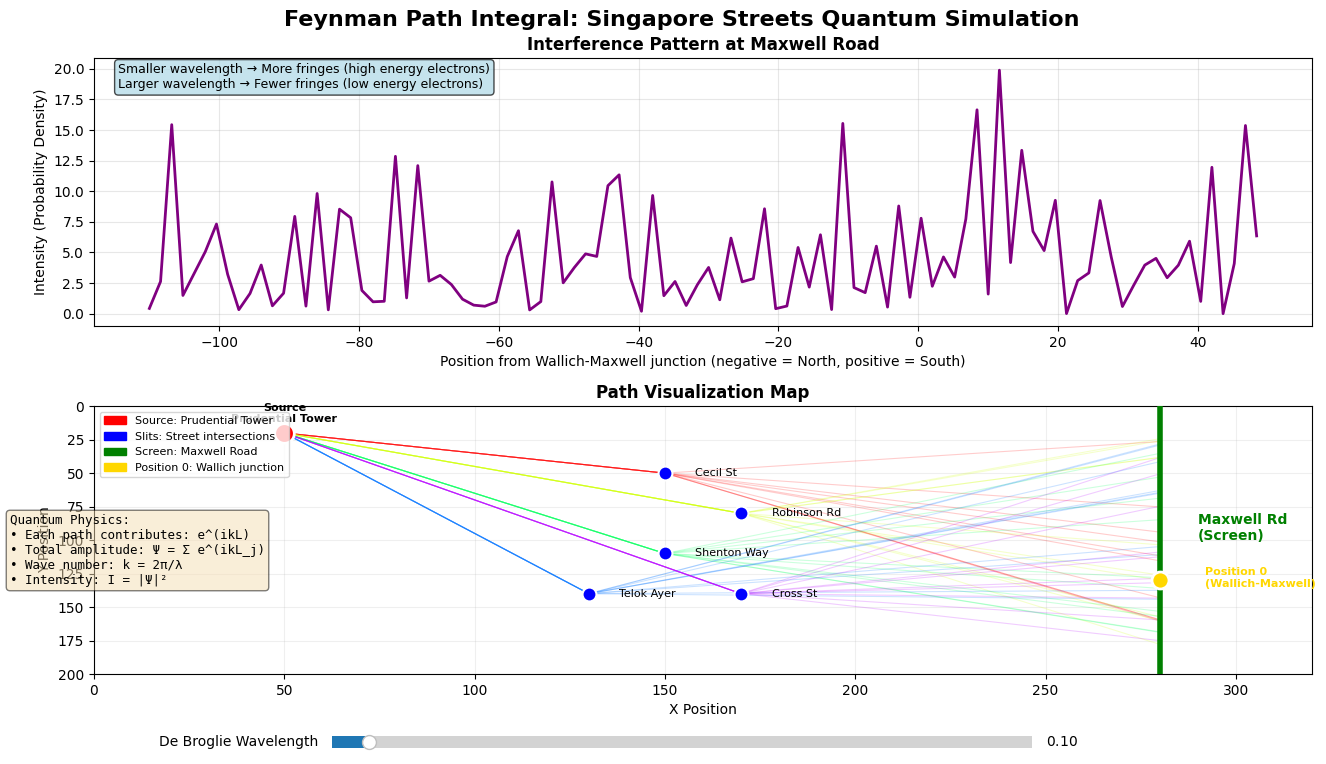


FEYNMAN PATH INTEGRAL SIMULATION

Physical Interpretation:
- Source: Prudential Tower emits electrons
- Slits: Major street intersections act as quantum pathways
- Screen: Maxwell Road is where we detect interference
- Reference: Position 0 is at Wallich-Maxwell junction

Controls:
- Adjust the wavelength slider to change electron energy
- Smaller λ = higher energy = more interference fringes
- Larger λ = lower energy = broader interference pattern

Note: Each electron interferes with itself through ALL
      possible paths simultaneously - that's quantum mechanics!


In [23]:
"""
Feynman Path Integral Simulation - Singapore Streets
Simulates quantum electron diffraction using street layout
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import matplotlib.patches as mpatches

# Define key locations based on the Singapore map
source = {'x': 50, 'y': 20, 'name': 'Prudential Tower'}

# Street "slits" - major intersections between source and screen
slits = [
    {'x': 150, 'y': 50, 'name': 'Cecil St'},
    {'x': 170, 'y': 80, 'name': 'Robinson Rd'},
    {'x': 150, 'y': 110, 'name': 'Shenton Way'},
    {'x': 130, 'y': 140, 'name': 'Telok Ayer'},
    {'x': 170, 'y': 140, 'name': 'Cross St'}
]

# Screen (Maxwell Road) and reference point
screen_x = 280
screen_points = 100
wallich_maxwell_y = 130  # Reference point: Wallich St & Maxwell Rd junction

def distance(p1, p2):
    """Calculate Euclidean distance between two points"""
    return np.sqrt((p2['x'] - p1['x'])**2 + (p2['y'] - p1['y'])**2)

def calculate_intensity(wavelength):
    """
    Calculate interference pattern using Feynman path integral formulation

    For each point on the screen, sum the quantum amplitudes from all
    possible paths through different street "slits"
    """
    intensities = []
    positions = []
    k = 2 * np.pi / wavelength  # wave number

    for i in range(screen_points):
        screen_y = 20 + (i * 160 / screen_points)
        screen_point = {'x': screen_x, 'y': screen_y}

        # Position relative to Wallich-Maxwell junction
        relative_position = screen_y - wallich_maxwell_y

        # Calculate path integral sum
        real_sum = 0
        imag_sum = 0

        # Sum over all possible paths through each slit
        for slit in slits:
            path1 = distance(source, slit)
            path2 = distance(slit, screen_point)
            total_path = path1 + path2

            # Phase = k * path length
            phase = k * total_path

            # Add complex amplitude: e^(i*phase)
            real_sum += np.cos(phase)
            imag_sum += np.sin(phase)

        # Intensity is |amplitude|^2
        amplitude = np.sqrt(real_sum**2 + imag_sum**2)
        intensity_value = amplitude**2

        positions.append(relative_position)
        intensities.append(intensity_value)

    return positions, intensities

def plot_paths(ax, num_paths=50):
    """Plot sample quantum paths from source through slits to screen"""
    paths_per_slit = num_paths // len(slits)
    colors = plt.cm.hsv(np.linspace(0, 0.8, len(slits)))

    for idx, slit in enumerate(slits):
        for _ in range(paths_per_slit):
            screen_y = 20 + np.random.random() * 160
            screen_point = {'x': screen_x, 'y': screen_y}

            # Draw path from source to slit
            ax.plot([source['x'], slit['x']],
                   [source['y'], slit['y']],
                   color=colors[idx], alpha=0.2, linewidth=0.8)

            # Draw path from slit to screen
            ax.plot([slit['x'], screen_point['x']],
                   [slit['y'], screen_point['y']],
                   color=colors[idx], alpha=0.2, linewidth=0.8)

# Create the figure with subplots
fig = plt.figure(figsize=(14, 8))
fig.suptitle('Feynman Path Integral: Singapore Streets Quantum Simulation',
             fontsize=16, fontweight='bold')

# Create grid for subplots
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3,
                      left=0.08, right=0.95, top=0.92, bottom=0.15)

# Subplot 1: Interference pattern
ax1 = fig.add_subplot(gs[0, :])
ax1.set_title('Interference Pattern at Maxwell Road', fontsize=12, fontweight='bold')
ax1.set_xlabel('Position from Wallich-Maxwell junction (negative = North, positive = South)',
               fontsize=10)
ax1.set_ylabel('Intensity (Probability Density)', fontsize=10)
ax1.grid(True, alpha=0.3)

# Subplot 2: Path visualization map
ax2 = fig.add_subplot(gs[1, :])
ax2.set_title('Path Visualization Map', fontsize=12, fontweight='bold')
ax2.set_xlabel('X Position', fontsize=10)
ax2.set_ylabel('Y Position', fontsize=10)
ax2.set_xlim(0, 320)
ax2.set_ylim(0, 200)
ax2.invert_yaxis()  # Invert y-axis to match map orientation
ax2.grid(True, alpha=0.2)

# Initial wavelength
initial_wavelength = 0.1

# Calculate and plot initial interference pattern
positions, intensities = calculate_intensity(initial_wavelength)
line1, = ax1.plot(positions, intensities, 'purple', linewidth=2)

# Draw paths on map
plot_paths(ax2, num_paths=50)

# Draw source
ax2.scatter(source['x'], source['y'], s=200, c='red', marker='o',
           edgecolors='white', linewidths=2, zorder=5, label='Source (Prudential Tower)')
ax2.text(source['x'], source['y'] - 8, 'Source\nPrudential Tower',
        ha='center', fontsize=8, fontweight='bold')

# Draw slits
for slit in slits:
    ax2.scatter(slit['x'], slit['y'], s=100, c='blue', marker='o',
               edgecolors='white', linewidths=1.5, zorder=5)
    ax2.text(slit['x'] + 8, slit['y'], slit['name'],
            fontsize=8, va='center')

# Draw screen (Maxwell Road)
ax2.axvline(x=screen_x, color='green', linewidth=4,
           label='Screen (Maxwell Rd)', zorder=4)
ax2.text(screen_x + 10, 100, 'Maxwell Rd\n(Screen)',
        fontsize=10, fontweight='bold', color='green')

# Mark Wallich-Maxwell junction (position 0)
ax2.scatter(screen_x, wallich_maxwell_y, s=150, c='gold', marker='o',
           edgecolors='white', linewidths=2, zorder=6)
ax2.text(screen_x + 12, wallich_maxwell_y + 5, 'Position 0\n(Wallich-Maxwell)',
        fontsize=8, fontweight='bold', color='gold')

# Add legend
legend_elements = [
    mpatches.Patch(color='red', label='Source: Prudential Tower'),
    mpatches.Patch(color='blue', label='Slits: Street intersections'),
    mpatches.Patch(color='green', label='Screen: Maxwell Road'),
    mpatches.Patch(color='gold', label='Position 0: Wallich junction')
]
ax2.legend(handles=legend_elements, loc='upper left', fontsize=8)

# Add slider for wavelength control
ax_slider = plt.axes([0.25, 0.05, 0.5, 0.03])
wavelength_slider = Slider(
    ax=ax_slider,
    label='De Broglie Wavelength',
    valmin=0.05,
    valmax=1.0,
    valinit=initial_wavelength,
    valstep=0.01
)

# Add physics info text
info_text = (
    'Quantum Physics:\n'
    '• Each path contributes: e^(ikL)\n'
    '• Total amplitude: Ψ = Σ e^(ikL_j)\n'
    '• Wave number: k = 2π/λ\n'
    '• Intensity: I = |Ψ|²'
)
fig.text(0.02, 0.35, info_text, fontsize=9,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
         verticalalignment='top', family='monospace')

def update(val):
    """Update the interference pattern when wavelength changes"""
    wavelength = wavelength_slider.val
    positions, intensities = calculate_intensity(wavelength)
    line1.set_ydata(intensities)

    # Update y-axis limits to fit new data
    ax1.set_ylim(0, max(intensities) * 1.1)
    fig.canvas.draw_idly()

# Connect slider to update function
wavelength_slider.on_changed(update)

# Add annotation about wavelength effect
ax1.text(0.02, 0.98,
         'Smaller wavelength → More fringes (high energy electrons)\n'
         'Larger wavelength → Fewer fringes (low energy electrons)',
         transform=ax1.transAxes, fontsize=9,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

plt.show()

print("\n" + "="*60)
print("FEYNMAN PATH INTEGRAL SIMULATION")
print("="*60)
print("\nPhysical Interpretation:")
print("- Source: Prudential Tower emits electrons")
print("- Slits: Major street intersections act as quantum pathways")
print("- Screen: Maxwell Road is where we detect interference")
print("- Reference: Position 0 is at Wallich-Maxwell junction")
print("\nControls:")
print("- Adjust the wavelength slider to change electron energy")
print("- Smaller λ = higher energy = more interference fringes")
print("- Larger λ = lower energy = broader interference pattern")
print("\nNote: Each electron interferes with itself through ALL")
print("      possible paths simultaneously - that's quantum mechanics!")
print("="*60)

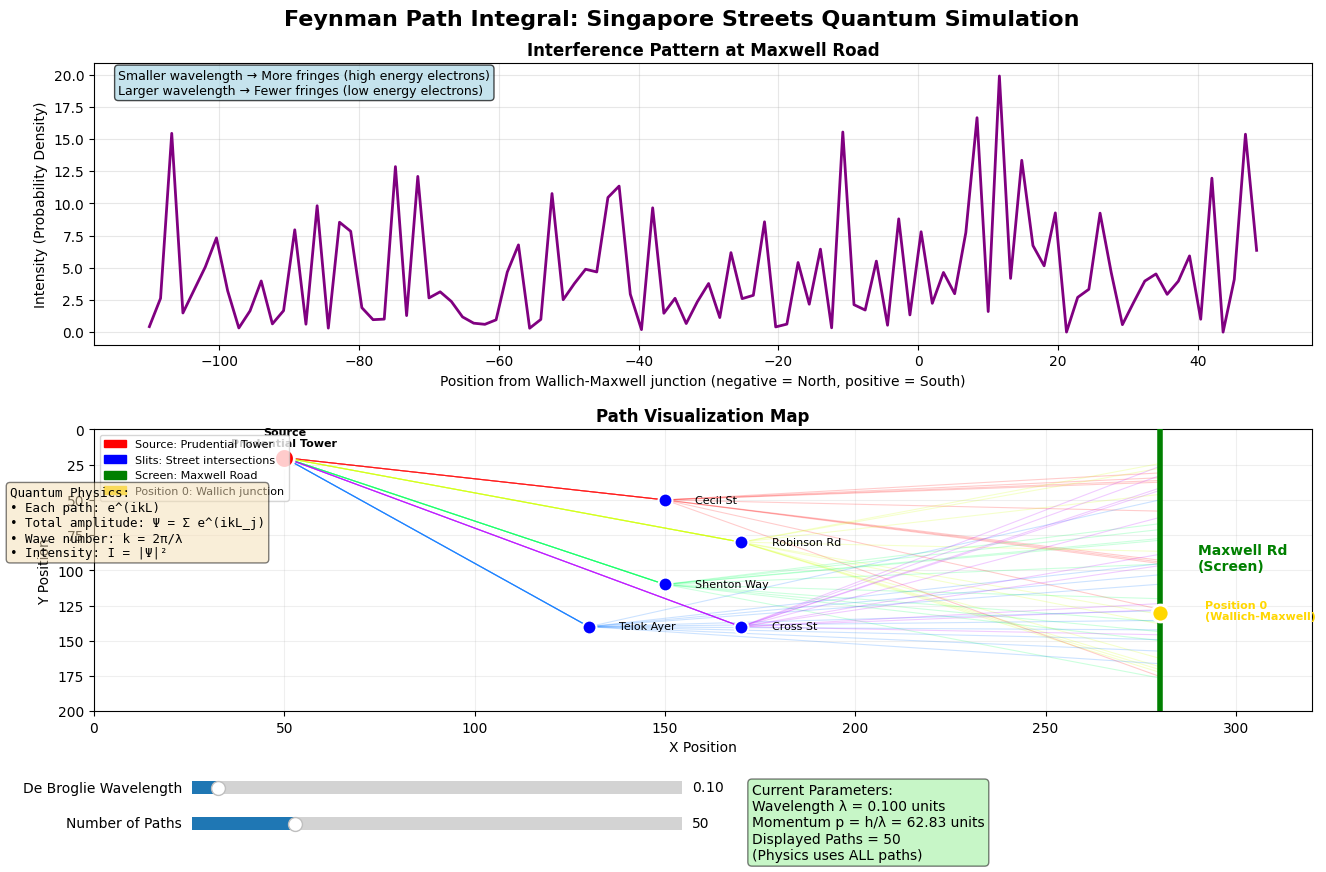


FEYNMAN PATH INTEGRAL SIMULATION - INTERACTIVE VERSION

Physical Interpretation:
- Source: Prudential Tower emits electrons
- Slits: Major street intersections act as quantum pathways
- Screen: Maxwell Road is where we detect interference
- Reference: Position 0 is at Wallich-Maxwell junction

Interactive Controls:
1. WAVELENGTH SLIDER:
   - Controls the de Broglie wavelength (λ = h/p)
   - Smaller λ = higher energy = more interference fringes
   - Larger λ = lower energy = broader interference pattern

2. NUMBER OF PATHS SLIDER:
   - Controls how many sample paths are displayed on the map
   - This is just for visualization!
   - The physics calculation uses ALL possible paths
   - More paths = denser visualization (may be slower)

Quantum Mechanics Note:
Each electron interferes with itself through ALL possible paths
simultaneously. The displayed paths are just samples to help
visualize the quantum process.


In [24]:
"""
Feynman Path Integral Simulation - Singapore Streets
Simulates quantum electron diffraction using street layout
Interactive controls for wavelength and number of paths
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import matplotlib.patches as mpatches

# Define key locations based on the Singapore map
source = {'x': 50, 'y': 20, 'name': 'Prudential Tower'}

# Street "slits" - major intersections between source and screen
slits = [
    {'x': 150, 'y': 50, 'name': 'Cecil St'},
    {'x': 170, 'y': 80, 'name': 'Robinson Rd'},
    {'x': 150, 'y': 110, 'name': 'Shenton Way'},
    {'x': 130, 'y': 140, 'name': 'Telok Ayer'},
    {'x': 170, 'y': 140, 'name': 'Cross St'}
]

# Screen (Maxwell Road) and reference point
screen_x = 280
screen_points = 100
wallich_maxwell_y = 130  # Reference point: Wallich St & Maxwell Rd junction

def distance(p1, p2):
    """Calculate Euclidean distance between two points"""
    return np.sqrt((p2['x'] - p1['x'])**2 + (p2['y'] - p1['y'])**2)

def calculate_intensity(wavelength):
    """
    Calculate interference pattern using Feynman path integral formulation

    For each point on the screen, sum the quantum amplitudes from all
    possible paths through different street "slits"
    """
    intensities = []
    positions = []
    k = 2 * np.pi / wavelength  # wave number

    for i in range(screen_points):
        screen_y = 20 + (i * 160 / screen_points)
        screen_point = {'x': screen_x, 'y': screen_y}

        # Position relative to Wallich-Maxwell junction
        relative_position = screen_y - wallich_maxwell_y

        # Calculate path integral sum
        real_sum = 0
        imag_sum = 0

        # Sum over all possible paths through each slit
        for slit in slits:
            path1 = distance(source, slit)
            path2 = distance(slit, screen_point)
            total_path = path1 + path2

            # Phase = k * path length
            phase = k * total_path

            # Add complex amplitude: e^(i*phase)
            real_sum += np.cos(phase)
            imag_sum += np.sin(phase)

        # Intensity is |amplitude|^2
        amplitude = np.sqrt(real_sum**2 + imag_sum**2)
        intensity_value = amplitude**2

        positions.append(relative_position)
        intensities.append(intensity_value)

    return positions, intensities

def plot_paths(ax, num_paths):
    """Plot sample quantum paths from source through slits to screen"""
    ax.clear()

    paths_per_slit = max(1, num_paths // len(slits))
    colors = plt.cm.hsv(np.linspace(0, 0.8, len(slits)))

    for idx, slit in enumerate(slits):
        for _ in range(paths_per_slit):
            screen_y = 20 + np.random.random() * 160
            screen_point = {'x': screen_x, 'y': screen_y}

            # Draw path from source to slit
            ax.plot([source['x'], slit['x']],
                   [source['y'], slit['y']],
                   color=colors[idx], alpha=0.2, linewidth=0.8)

            # Draw path from slit to screen
            ax.plot([slit['x'], screen_point['x']],
                   [slit['y'], screen_point['y']],
                   color=colors[idx], alpha=0.2, linewidth=0.8)

    # Redraw all static elements
    ax.set_title('Path Visualization Map', fontsize=12, fontweight='bold')
    ax.set_xlabel('X Position', fontsize=10)
    ax.set_ylabel('Y Position', fontsize=10)
    ax.set_xlim(0, 320)
    ax.set_ylim(0, 200)
    ax.invert_yaxis()
    ax.grid(True, alpha=0.2)

    # Draw source
    ax.scatter(source['x'], source['y'], s=200, c='red', marker='o',
               edgecolors='white', linewidths=2, zorder=5)
    ax.text(source['x'], source['y'] - 8, 'Source\nPrudential Tower',
            ha='center', fontsize=8, fontweight='bold')

    # Draw slits
    for slit in slits:
        ax.scatter(slit['x'], slit['y'], s=100, c='blue', marker='o',
                   edgecolors='white', linewidths=1.5, zorder=5)
        ax.text(slit['x'] + 8, slit['y'], slit['name'],
                fontsize=8, va='center')

    # Draw screen (Maxwell Road)
    ax.axvline(x=screen_x, color='green', linewidth=4, zorder=4)
    ax.text(screen_x + 10, 100, 'Maxwell Rd\n(Screen)',
            fontsize=10, fontweight='bold', color='green')

    # Mark Wallich-Maxwell junction (position 0)
    ax.scatter(screen_x, wallich_maxwell_y, s=150, c='gold', marker='o',
               edgecolors='white', linewidths=2, zorder=6)
    ax.text(screen_x + 12, wallich_maxwell_y + 5, 'Position 0\n(Wallich-Maxwell)',
            fontsize=8, fontweight='bold', color='gold')

    # Add legend
    legend_elements = [
        mpatches.Patch(color='red', label='Source: Prudential Tower'),
        mpatches.Patch(color='blue', label='Slits: Street intersections'),
        mpatches.Patch(color='green', label='Screen: Maxwell Road'),
        mpatches.Patch(color='gold', label='Position 0: Wallich junction')
    ]
    ax.legend(handles=legend_elements, loc='upper left', fontsize=8)

# Create the figure with subplots
fig = plt.figure(figsize=(14, 9))
fig.suptitle('Feynman Path Integral: Singapore Streets Quantum Simulation',
             fontsize=16, fontweight='bold')

# Create grid for subplots
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3,
                      left=0.08, right=0.95, top=0.92, bottom=0.20)

# Subplot 1: Interference pattern
ax1 = fig.add_subplot(gs[0, :])
ax1.set_title('Interference Pattern at Maxwell Road', fontsize=12, fontweight='bold')
ax1.set_xlabel('Position from Wallich-Maxwell junction (negative = North, positive = South)',
               fontsize=10)
ax1.set_ylabel('Intensity (Probability Density)', fontsize=10)
ax1.grid(True, alpha=0.3)

# Subplot 2: Path visualization map
ax2 = fig.add_subplot(gs[1, :])

# Initial parameters
initial_wavelength = 0.1
initial_num_paths = 50

# Calculate and plot initial interference pattern
positions, intensities = calculate_intensity(initial_wavelength)
line1, = ax1.plot(positions, intensities, 'purple', linewidth=2)

# Draw initial paths on map
plot_paths(ax2, initial_num_paths)

# Add slider for wavelength control
ax_wavelength_slider = plt.axes([0.15, 0.10, 0.35, 0.03])
wavelength_slider = Slider(
    ax=ax_wavelength_slider,
    label='De Broglie Wavelength',
    valmin=0.05,
    valmax=1.0,
    valinit=initial_wavelength,
    valstep=0.01
)

# Add slider for number of paths control
ax_paths_slider = plt.axes([0.15, 0.06, 0.35, 0.03])
paths_slider = Slider(
    ax=ax_paths_slider,
    label='Number of Paths',
    valmin=10,
    valmax=200,
    valinit=initial_num_paths,
    valstep=10,
    valfmt='%0.0f'
)

# Add physics info text
info_text = (
    'Quantum Physics:\n'
    '• Each path: e^(ikL)\n'
    '• Total amplitude: Ψ = Σ e^(ikL_j)\n'
    '• Wave number: k = 2π/λ\n'
    '• Intensity: I = |Ψ|²'
)
fig.text(0.02, 0.45, info_text, fontsize=9,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
         verticalalignment='top', family='monospace')

# Add current values display
values_text = fig.text(0.55, 0.12, '', fontsize=10,
                      bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5),
                      verticalalignment='top')

def update_values_display():
    """Update the display of current parameter values"""
    wavelength = wavelength_slider.val
    num_paths = int(paths_slider.val)

    # Calculate electron momentum (in arbitrary units)
    momentum = 2 * np.pi / wavelength

    text = (f'Current Parameters:\n'
            f'Wavelength λ = {wavelength:.3f} units\n'
            f'Momentum p = h/λ = {momentum:.2f} units\n'
            f'Displayed Paths = {num_paths}\n'
            f'(Physics uses ALL paths)')
    values_text.set_text(text)

def update_wavelength(val):
    """Update the interference pattern when wavelength changes"""
    wavelength = wavelength_slider.val
    positions, intensities = calculate_intensity(wavelength)
    line1.set_ydata(intensities)

    # Update y-axis limits to fit new data
    ax1.set_ylim(0, max(intensities) * 1.1)
    update_values_display()
    fig.canvas.draw_idly()

def update_paths(val):
    """Update the path visualization when number of paths changes"""
    num_paths = int(paths_slider.val)
    plot_paths(ax2, num_paths)
    update_values_display()
    fig.canvas.draw_idly()

# Connect sliders to update functions
wavelength_slider.on_changed(update_wavelength)
paths_slider.on_changed(update_paths)

# Add annotation about wavelength effect
ax1.text(0.02, 0.98,
         'Smaller wavelength → More fringes (high energy electrons)\n'
         'Larger wavelength → Fewer fringes (low energy electrons)',
         transform=ax1.transAxes, fontsize=9,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

# Initialize values display
update_values_display()

plt.show()

print("\n" + "="*70)
print("FEYNMAN PATH INTEGRAL SIMULATION - INTERACTIVE VERSION")
print("="*70)
print("\nPhysical Interpretation:")
print("- Source: Prudential Tower emits electrons")
print("- Slits: Major street intersections act as quantum pathways")
print("- Screen: Maxwell Road is where we detect interference")
print("- Reference: Position 0 is at Wallich-Maxwell junction")
print("\nInteractive Controls:")
print("1. WAVELENGTH SLIDER:")
print("   - Controls the de Broglie wavelength (λ = h/p)")
print("   - Smaller λ = higher energy = more interference fringes")
print("   - Larger λ = lower energy = broader interference pattern")
print("\n2. NUMBER OF PATHS SLIDER:")
print("   - Controls how many sample paths are displayed on the map")
print("   - This is just for visualization!")
print("   - The physics calculation uses ALL possible paths")
print("   - More paths = denser visualization (may be slower)")
print("\nQuantum Mechanics Note:")
print("Each electron interferes with itself through ALL possible paths")
print("simultaneously. The displayed paths are just samples to help")
print("visualize the quantum process.")
print("="*70)